# Mid-Bootcamp project: Housing case study

* **Research Goal**: 
1. Building a model that will predict the price of a house with an accuracy of 70%
2. Understanding the factors/features that are responsible for higher property value >= $650K 
               
* **Dataset**: provided by Ironhack (Kaggle?), containing historic house sale prices for 22,000 properties in Kingcounty. The dataset consists houses sold between May 2014 and May 2015.
The dataset must be  available public on https://info.kingcounty.gov/assessor/DataDownload/default.aspx


**note**: normally housing prices are affected by several factors, external and internal. External related to macroeconomics (GDP, population, employment, income per capita, demand, inflation rate etc.) and internal (no. of rooms, location, size, age of the house etc.). We are looking into the internal factors in this notebook.

**what benefits does prediciton of housing prices bring?** why would we build a prediction model? What is our motivation and perspective future goal?

- it is important for social-economic development, and individual well-being subjectively 
- access to housing! Housing becomes highly unaffordable for indivduals with avg income, and especially for first-buyers. This will create a gap in the society, namly wealth inequality.
- This might lead to high rent prices as well, as a substitute of buying, the demand on renting will rise up! Also renting becomes less affordable; therefore individuals seek housing in outskirts areas that might have no access to education, health, etc. besides restricting mobility. (I would be down to explore this!) 


In [180]:
# prepare the environment

import numpy as np #working with arrays and linear algebra
import pandas as pd #working with Dataframes and data processing
import matplotlib.pyplot as plt #for plotting graphs
%matplotlib inline 
import seaborn as sns
import warnings #get rid of warning
warnings.filterwarnings("ignore") 
from scipy import stats


In [181]:
#get the data
data=pd.read_csv('regression_data_clean.csv')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


# 1. Exploration / EDA

In [182]:
#let's get a feel for our data: head, shape, count etc. 
data.shape

(21597, 21)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [184]:
#checking again for null values
data.isna().any()
#no null values! beautiful, one thing not to worry about :)

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [185]:
# checking data types
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [186]:
#let's get some statistics
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [187]:
#Quick observation: 
# we have a massive house with 33 bedrooms (outlier?). I need to check this out!
#how come we have .5 bathrooms?
# we notice the min and mac sqft_living, sqft_basement and so on.
# would be nice to explore this in more details in a bit.
# also noticed getting the age of the house might be beneficial too. 
# getting a column for months is also needed!


In [188]:
# checking the one with 33 rooms
house33= data.sort_values ('bedrooms', ascending=False)
house33
#it seems it is a typo (the 33rooms), how come we have 33 bedrooms in 1620 sqft! def. dropping it later.
#or changing it to 3 makes more sense!

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,6/25/14,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000
8748,1773100755,8/21/14,11,3.00,3000,4960,2.0,0,0,3,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
13301,627300145,8/14/14,10,5.25,4590,10920,1.0,0,2,3,...,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
19239,8812401450,12/29/14,10,3.00,2920,3745,2.0,0,0,4,...,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000
15147,5566100170,10/29/14,10,2.00,3610,11914,2.0,0,0,4,...,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,8/29/14,1,1.00,530,6350,1.0,0,0,5,...,530,0,1941,0,98103,47.6946,-122.357,1200,6350,238000
13316,4356200120,10/23/14,1,1.00,790,12000,1.0,0,0,3,...,790,0,1918,0,98118,47.5146,-122.265,1900,6000,248000
7010,203100460,9/24/14,1,1.00,530,13679,1.0,0,0,4,...,530,0,1949,0,98053,47.6422,-121.954,1930,20624,400000
3578,1925069006,12/3/14,1,0.75,530,33278,1.0,0,2,4,...,530,0,1950,0,98074,47.6412,-122.079,2830,14311,355000


In [189]:
#checking .5 bathroom
halfbathroom= data.sort_values ('bathrooms')
halfbathroom
# maybe meaning a room with a toilet but no shower? how to check that? 
#we have no 0 bathrooms

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2259,3971701455,10/3/14,2,0.50,1180,7750,1.0,0,0,4,...,590,590,1945,0,98155,47.7690,-122.316,1380,8976,273000
12029,2991000160,12/12/14,4,0.50,2300,5570,2.0,0,0,3,...,2300,0,1996,0,98092,47.3285,-122.168,1820,6371,312500
11662,7987400316,8/14/14,1,0.50,880,1642,1.0,0,0,3,...,500,380,1910,0,98126,47.5732,-122.372,1410,2992,255000
10413,7129800036,1/14/15,2,0.50,580,6900,1.0,0,0,3,...,580,0,1941,0,98118,47.5135,-122.262,1570,5040,109000
21596,1523300157,10/15/14,2,0.75,1020,1076,2.0,0,0,3,...,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,9175600025,10/7/14,7,6.75,7480,41664,2.0,0,2,3,...,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,800000
8537,424049043,8/11/14,9,7.50,4050,6504,2.0,0,0,3,...,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,450000
9245,9208900037,9/19/14,6,7.75,9890,31374,2.0,0,4,3,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
7245,6762700020,10/13/14,6,8.00,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000


In [190]:
#let's check our target variable 'price' statistically
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [191]:
# checking duplicates/unique values/ frequency
data['id'].value_counts()
#this tells us that there are houses that were sold more than once! the max 3 times

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [192]:
#how to deal with this? let's find duplicates and create a new dataframe- might come in handy later
duplicated_id = data[data.duplicated(['id'], keep = False)]# False: Mark all duplicates as True/ return all dup.
duplicated_id.sort_values('id') #organize the data a bit :)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,4/22/15,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
2494,1000102,9/16/14,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,280000
16800,7200179,10/16/14,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,150000
16801,7200179,4/24/15,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,10/20/14,3,1.75,1480,3900,1.0,0,0,4,...,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/14,2,1.00,700,4800,1.0,0,0,3,...,700,0,1922,0,98122,47.6147,-122.300,1440,4800,260000
15186,9834200305,2/10/15,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000
15185,9834200305,7/16/14,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,350000
1084,9834200885,7/17/14,4,2.50,2080,4080,1.0,0,0,5,...,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080,360000


In [193]:
duplicated_id ['id'].value_counts()
#176 houses were sold more than once, max 3 times

795000620     3
8651402750    2
5536100020    2
9238500040    2
1995200200    2
             ..
8062900070    2
4139440480    2
2568300045    2
2143700830    2
2023049218    2
Name: id, Length: 176, dtype: int64

### Observation
#### same house id was sold more than once, different date, different price, what we can quickly notice: **the price increased in time!** (worth checking for later!)

In [194]:
data['bedrooms'].value_counts()
#the most frequent are 3 bed rooms registering 9824



3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [195]:
# Iprefer reading percentages sometimes 
data['bedrooms'].value_counts(normalize=True)*100

3     45.487799
4     31.865537
2     12.779553
5      7.413067
6      1.259434
1      0.907533
7      0.175950
8      0.060194
9      0.027782
10     0.013891
11     0.004630
33     0.004630
Name: bedrooms, dtype: float64

In [196]:
data['view'].unique()

array([0, 3, 4, 2, 1])

In [197]:
data['zipcode'].value_counts()
#what does zipcode tell us? we have 70 zipcode! can we categroize, meaning grouping them? i feel it is too much for now

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [198]:
data['grade'].value_counts()
#1 poor short on design and construction and 13 excellent high quality of design and structure. 7 would be avg.  

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [199]:
data['waterfront'].value_counts()
#dummy variables 0 no access and 1 with access 

0    21434
1      163
Name: waterfront, dtype: int64

### Data cleaning:
* 1. convert the date format  
* 2. changing the data types (check below)
* 3. replacing the 33 rooms with 3. I just feel it makes more sense considering the rest of the data (proportionally with number of rooms and sqm) and I don't like dropping :). 
* 4. notice that we are keeping duplicates because they are important for price over time (my hypothesis?) 
* 5. no null values detected, therefore; nothing can be performed (or maybe at a later stage, check white spaces).
### Data wrangling:
* 1. create new 2 columns 'year' and 'month' for time analysis. might help to find relation between the data and price / outcome.
* 2. remove column 'date'. We extracted the hopefuly 'meaningful' year and month out of it.
* 3. get the age of the house: year sold- year_built. I am trying to come up with feature that can explain a relation between the price and data. 
* 4. I am very tempting to calculate price per sqm but i guess this would lead to bad modeling, i will be playing with hot water - the target variable itself!!!
* 5. convert renovated_year into binary 1= True renovation and 0 = no/False renovation
* 6. convert basement into binary 1= exists basement and 0 no 

In [200]:
data['date'].head

<bound method NDFrame.head of 0        10/13/14
1         12/9/14
2         2/25/15
3         12/9/14
4         2/18/15
           ...   
21592     5/21/14
21593     2/23/15
21594     6/23/14
21595     1/16/15
21596    10/15/14
Name: date, Length: 21597, dtype: object>

In [201]:
#defining a function for the date column 
def clean_date(data):
    data['date']=pd.to_datetime(data['date'], errors='coerce')
    data['month_sold']=data['date'].apply(lambda date: date.month) #extract month
    data['year_sold']=data['date'].apply(lambda date: date.year) #extract year
    data.drop(['date'],axis=1,inplace=True) #dropping it
    return data

clean_date(data) # to call the function 

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,10,2014
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12,2014
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,2,2015
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,12,2014
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,98103,47.6993,-122.346,1530,1509,360000,5,2014
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,98146,47.5107,-122.362,1830,7200,400000,2,2015
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,98144,47.5944,-122.299,1020,2007,402101,6,2014
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,...,2004,0,98027,47.5345,-122.069,1410,1287,400000,1,2015


In [202]:
# useless unique data, no relationship
del data ['id'] 

In [203]:
data.head ()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,2,2015


In [204]:
# replacing 33 with 3 as explained above 
#data['bedrooms'] = data['bedrooms'].replace(['33'],'3', inplace= True)
data.bedrooms= data.bedrooms.replace(33, 3)
data.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [205]:
#checking that there is no more 33
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,...,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05,6.573969,2014.322962
std,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,...,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,3.115061,0.467619
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000000,2014.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,4.000000,2014.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,6.000000,2014.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,9.000000,2015.000000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,12.000000,2015.000000


In [206]:
data.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
month_sold         int64
year_sold          int64
dtype: object

In [207]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  price 

In [208]:
# please not that I moved Data transformation/ feature engineering into the section of Visualisation. 
# you will see more data wrangling down.

# 3. Visualization / finding patterns
### It's showtime!


In [209]:
# in order to decide on features, we need to visually see the linkage and correlation. 
#we want to identify internal house features that affect price. i.e. what are our potential predictors? 

#Literature review says that physical conditions (size, no of bedrooms, availability of basement, garage, age 
#of the house, area genrally), as well as concept (meaning minimalist, green environment)and location
#(access to facilities) are important factors affect house prices. 

#I want to check this in this section through hist, count plot and correlation matrix etc. 
# I want to identify distribution, check skeweness, outlayers, patterns (between price and x variables)


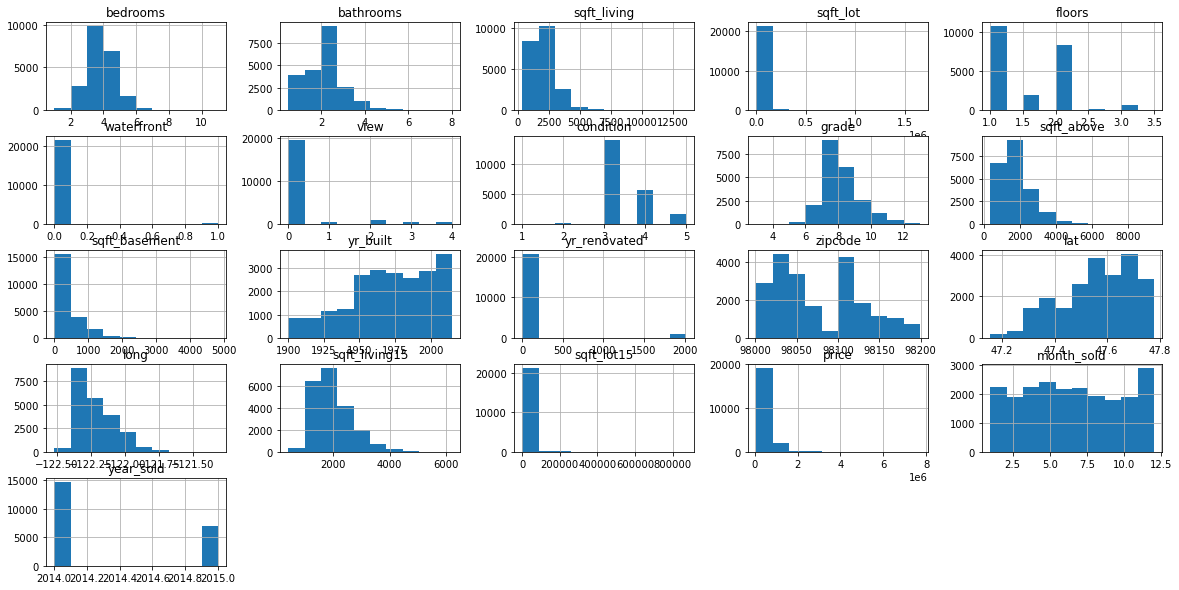

In [210]:
# let's have a quick check on the frequency of numeric (int) coloumns 
data.hist(figsize=(20,10))
plt.show()
# checking outliers, quick distribution.

<AxesSubplot:xlabel='price', ylabel='Density'>

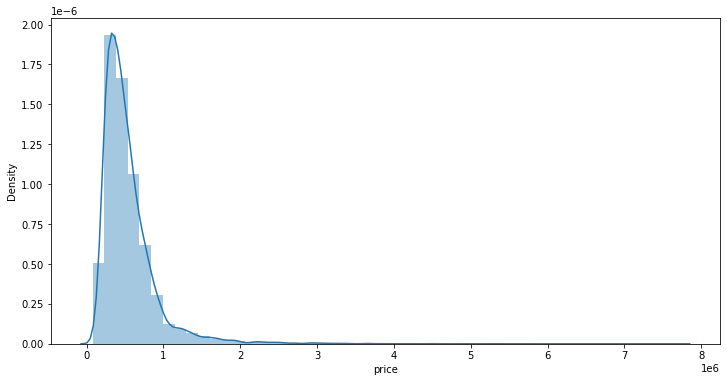

In [211]:
#observation:
# most graphs that i am interested in show sekeweness to the left (except for yr_built, lat, long, age
#and kinda a density in the centre
# a few have long tails to the right 


#checking distribution for our target, price. skewed to the left 

plt.figure(figsize=(12,6))
sns.distplot(data['price'])


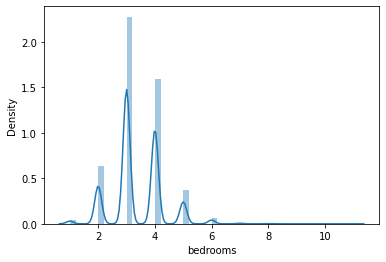

In [212]:
#for bedrooms! extra, does not hurt :)
sns.distplot(data.bedrooms)
plt.show()

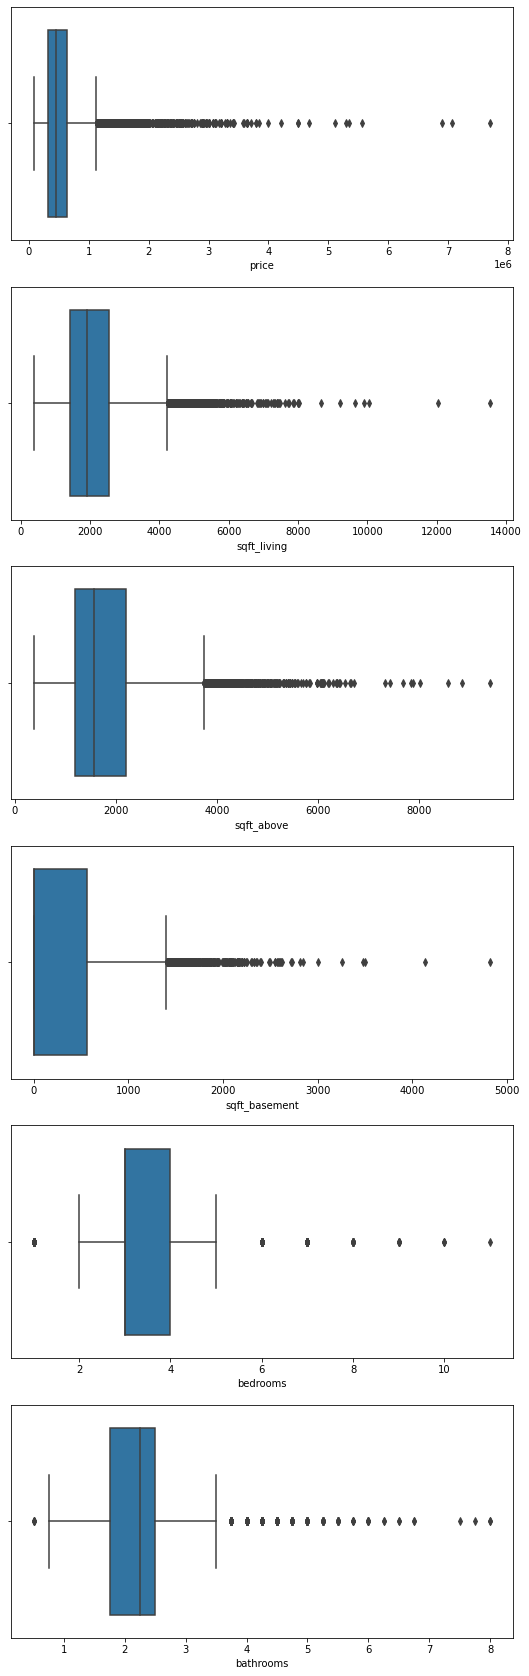

In [213]:
# Checking outliers quickly for some variables I am interested in
fig, axs = plt.subplots(6, figsize=(9,30))

sns.boxplot(x = 'price', data = data, ax = axs[0])
sns.boxplot(x = 'sqft_living', data = data, ax = axs[1])
sns.boxplot(x = 'sqft_above', data = data, ax = axs[2])
sns.boxplot(x = 'sqft_basement', data = data, ax = axs[3])
sns.boxplot(x = 'bedrooms', data = data, ax = axs[4])
sns.boxplot(x = 'bathrooms', data = data, ax = axs[5])
plt.show()

In [214]:
# observations: 
# many outliers existing for price, bedrooms, sqft_living, basement and bathrooms. 
#but outliers for price do correspond with outliers for bedrooms, bathrooms, sqft_living
#and SQFT_basement (if i drop zeros)? let's
# figure this out! if yes, those are totally legitmate outliers and I will keep them. otherwise, I might see 
#how to deal with them!

## numeric variables
* checking relationship between price our predictor variable and other x numeric / continious variables

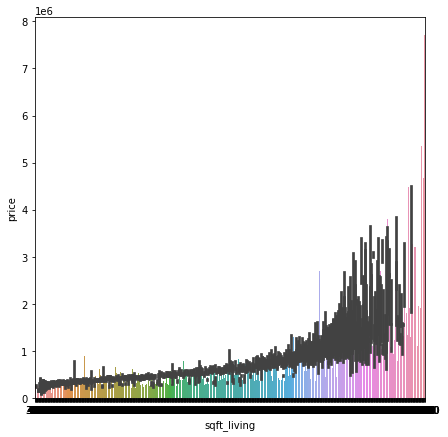

In [215]:
#between sqft_living and price. going with my first assumption
plt.figure(figsize=(7,7))
sns.barplot(x='sqft_living',y='price',data=data)
plt.show()

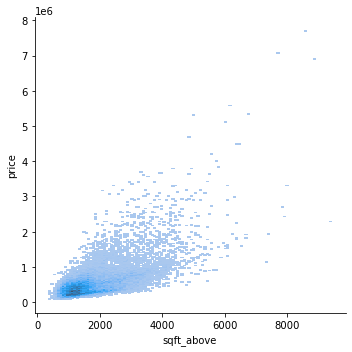

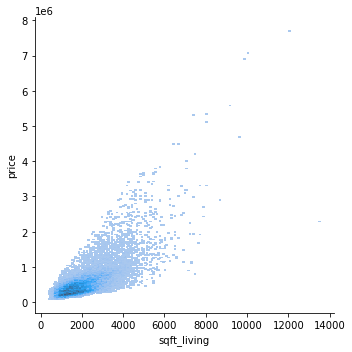

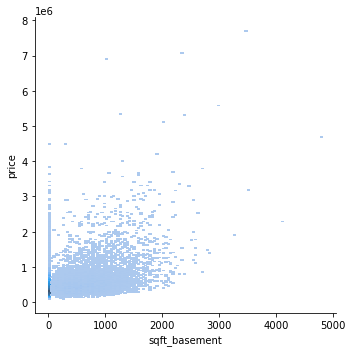

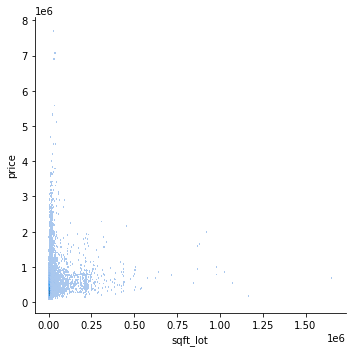

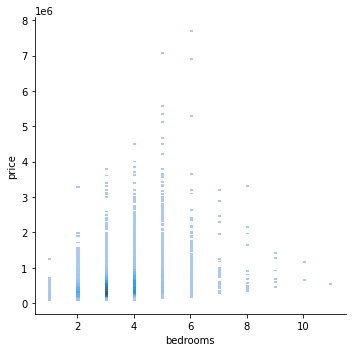

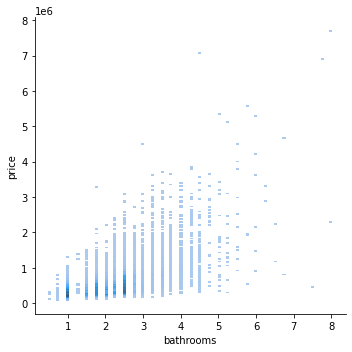

In [216]:
# let's check some direct relationships between price and other numeric or continious variables
# sqft_lot, sqft_above = (sqft_living - sqft_basement), sqft_basement, sqft_living15,sqft_lot15, yr_built, 
# yr_renovated, lat, long

no1= sns.displot(data=data, x="sqft_above", y="price", ax = axs[0])
no2= sns.displot(data=data, x="sqft_living", y="price", ax = axs[1])
no3= sns.displot(data=data, x="sqft_basement", y="price", ax = axs[2])
no4= sns.displot(data=data, x="sqft_lot", y="price", ax = axs[3])
no5= sns.displot(data=data, x="bedrooms", y="price", ax = axs[4])
no6= sns.displot(data=data, x="bathrooms", y="price", ax = axs[5])

plt.show()


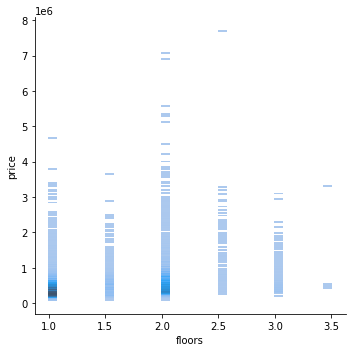

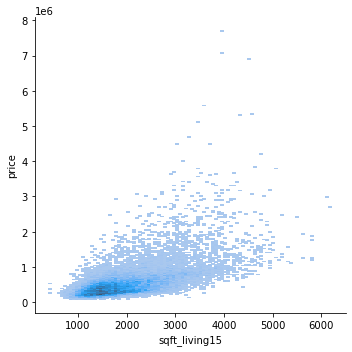

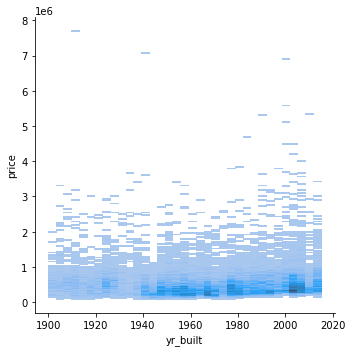

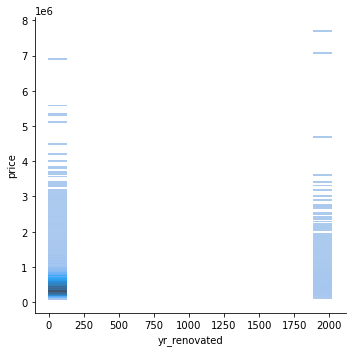

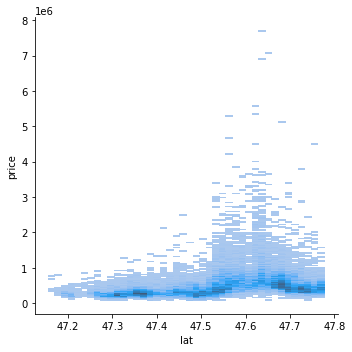

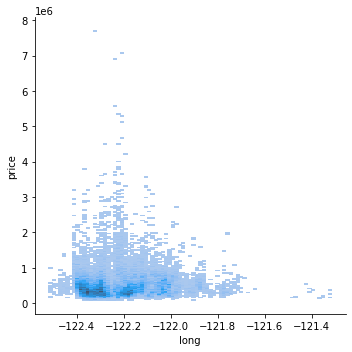

In [217]:
no1= sns.displot(data=data, x="floors", y="price", ax = axs[0])
no2= sns.displot(data=data, x="sqft_living15", y="price", ax = axs[1])
no3= sns.displot(data=data, x="yr_built", y="price", ax = axs[2])
no4= sns.displot(data=data, x="yr_renovated", y="price", ax = axs[3])
no5= sns.displot(data=data, x="lat", y="price", ax = axs[4])
no6= sns.displot(data=data, x="long", y="price", ax = axs[5])
plt.show()

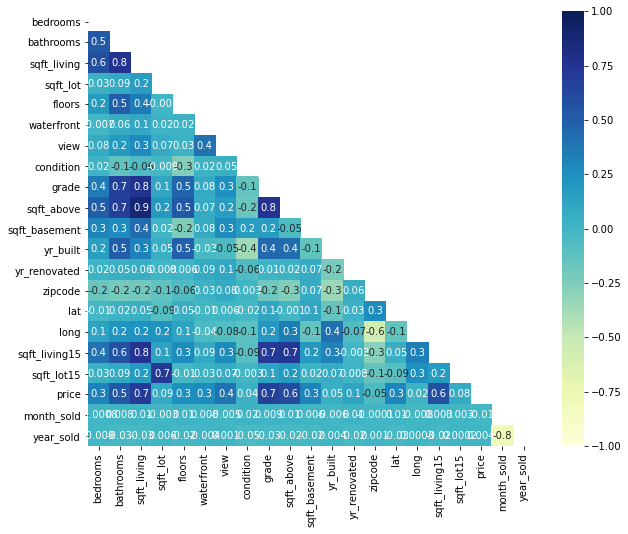

In [218]:
#overview heatmap with correlation cooeficient
corr=data.corr()
mask = np.zeros_like(corr) # returns an array of zeros with the same shape?
mask[np.triu_indices_from(mask)]= True 
f, ax = plt.subplots(figsize=(10, 8))
c=sns.heatmap(corr, mask=mask,vmin = -1, vmax = 1, annot= True, cmap="YlGnBu", fmt='.1g') # adjusting the bar measurment


### observation: 
#### no.1 yes, as i can tell from graphs price outliers do correspond with no. of bedrooms, bathrooms, sqft_living- keeping them for now
#### no.2 price increases with increase in sqft_living, sqft_above,sqft_basement, number of bedrooms and bathrooms
#### no.3 prices are a bit higher for 2 floors
#### no.4 many houses have zero basement, i.e. no basement 
####  no.5 yr_renovated, the way it is does not tell much, gd that we transformed it. maybe there is a some correlation with the renovation if renovated?
#### no.6 as assumed, price has high correlation with sqft_living, sqft_above, sqft_basement (.7, .6, .3)
#### no.7 high relationship between sqft.living and above 0.9! living and basement 0.3 and living and livin 15 0.8
#### no.8 not surprised, there is a relatively gd correlation between price and number of bedrooms, bathrooms, floors
#### no.9 lat and price, we have 0.3! let's have a look! worth including it
#### no.10 sqft_lot, sqft_lot15 are poorly related to price. same applies to yr_built, and yr_renovated

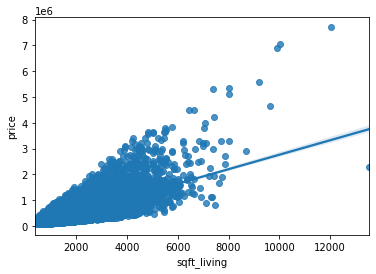

In [219]:
# to double check my above observation for the correlation, i am running quickly linear regression relationship
# visually using seaborn regplot
sns.regplot(x="sqft_living", y="price", data=data, fit_reg = True)
plt.show()


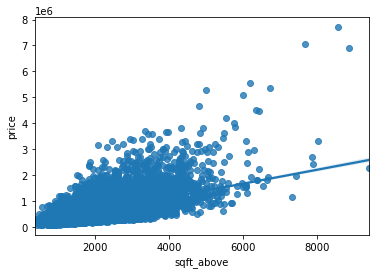

In [220]:
sns.regplot(x="sqft_above", y="price", data= data, fit_reg = True)
plt.show()

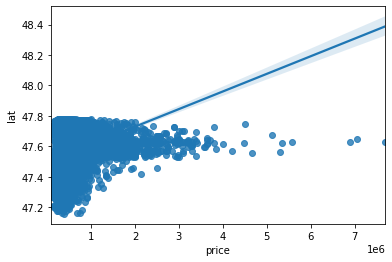

In [221]:
sns.regplot(x="price", y="lat", data= data, fit_reg = True)
plt.show()

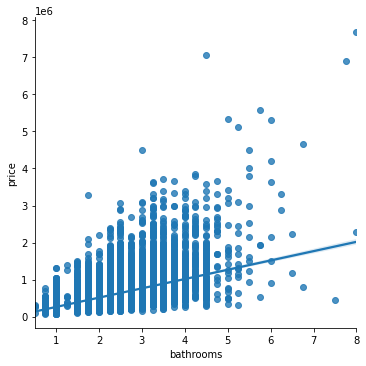

In [222]:
#sns.lmplot(x="bedrooms", y="price", data=data)
sns.lmplot(x="bathrooms", y="price", data=data)
#sns.lmplot(x="floors", y="price", data=data)
plt.show()

In [223]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  price 

### Data transformation/ feature engineering

In [224]:
# we do some feature engineering: 
# getting the age of the house as another testing feature
#feature engineering: creating new columns from data in order to find better or directe relationship between our
# data and the target-price

data['age']=data['year_sold']-data['yr_built']
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold,age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,98178,47.5112,-122.257,1340,5650,221900,10,2014,59
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,538000,12,2014,63
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,98028,47.7379,-122.233,2720,8062,180000,2,2015,82
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,98136,47.5208,-122.393,1360,5000,604000,12,2014,49
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,98074,47.6168,-122.045,1800,7503,510000,2,2015,28


In [225]:
# transform data: converting the renovation_year 
# (! check workshop by Flo: apply, map, filter and reduce)

data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['renovated'].astype('object')
#Converting might improve the accquracy of the model, this column seems for now essential to have it as a feature

In [226]:
# noticed many 0 basements_sql, let's transfer it too. so we don't get many zeros and miss our data
data['basement'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['basement'] = data['sqft_basement'].astype('object')

#### note: After failing the first model, we noticed we've got many discrete data, meaning countable data and separate e.g Waterfront (0,1 / binary), view (0,1,2,3,4), condition (1-5), grade (1-13). I assume data will tell us more if we adjust them/ discretize variables? this might be helpful for the forest-tree model (if i had enough time to run it)

In [227]:
# changing data types to fit the models and our needs. irritating process 
def data_type(data):
    data['year_sold']=data['year_sold'].astype(str)
    data['month_sold']= data['month_sold'].astype(str)
    data['zipcode']=data['zipcode'].astype(str)
    data['condition']=data['condition'].astype(str)
    data['waterfront']=data ['waterfront'].astype(str)
    data['grade']= data['grade'].astype(str)
    data ['view']= data['view'].astype(str)
    return data
data_type(data)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,price,month_sold,year_sold,age,renovated,basement
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,47.5112,-122.257,1340,5650,221900,10,2014,59,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,47.7210,-122.319,1690,7639,538000,12,2014,63,1,400
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,47.7379,-122.233,2720,8062,180000,2,2015,82,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,47.5208,-122.393,1360,5000,604000,12,2014,49,0,910
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,47.6168,-122.045,1800,7503,510000,2,2015,28,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,47.6993,-122.346,1530,1509,360000,5,2014,5,0,0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,47.5107,-122.362,1830,7200,400000,2,2015,1,0,0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,47.5944,-122.299,1020,2007,402101,6,2014,5,0,0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,47.5345,-122.069,1410,1287,400000,1,2015,11,0,0


In [228]:
data.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
month_sold        object
year_sold         object
age                int64
renovated         object
basement          object
dtype: object

### Categrical variables
* checking correlation with categorical values: waterfront, view, condition, grade, zipcode? (i guess, i am dropping zipcode), month sold, year sold, renovated

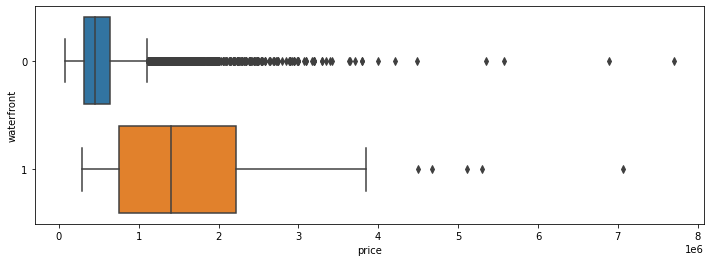

In [229]:
#relation to waterfront 
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'waterfront', x = 'price', data = data,ax = ax)
plt.show()

In [230]:
#observation 
#having a waterfront leading to a higher house value? 
# no water box is short- the prices of houses in this group are similar, but we have many outliers
# on the other hand the water box is taller, meaning the prices do differ in this group
# waterfront--> higher prices.. we need to see the correlation 

In [231]:
# when u get time, sort data
#data=df.sort_values('grade',ascending=False)

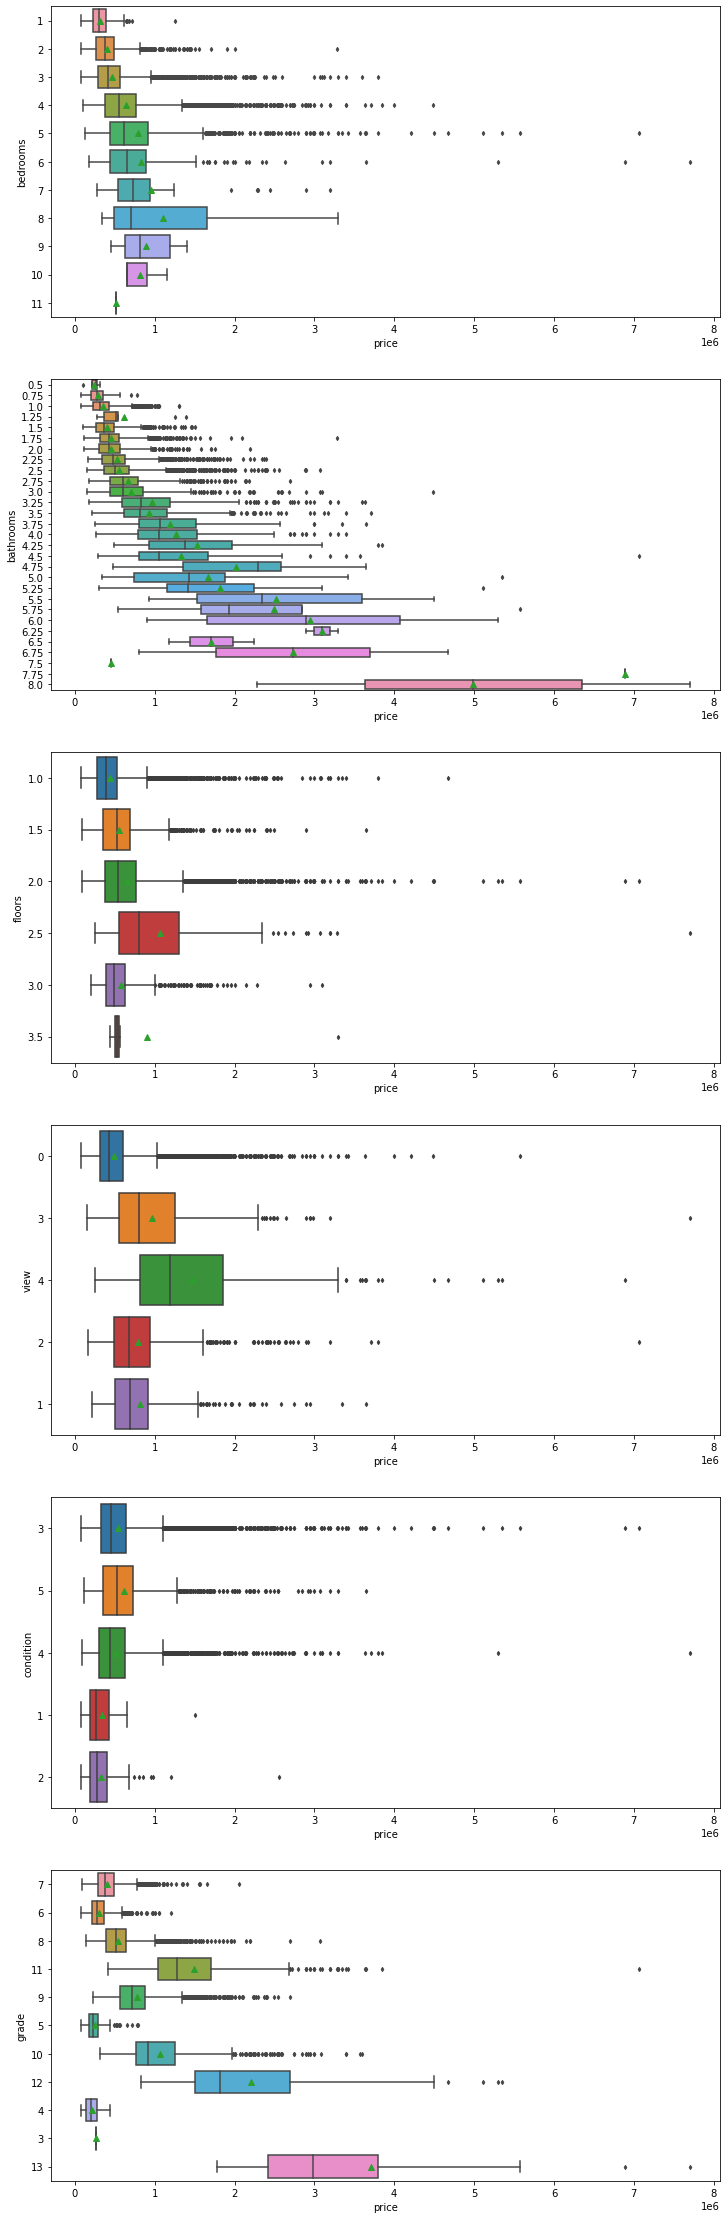

In [232]:
# it is better to do boxplot for bedrooms, bathrooms, and floors- shall we change their type to obj too? (debatable)

fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

<AxesSubplot:xlabel='price', ylabel='renovated'>

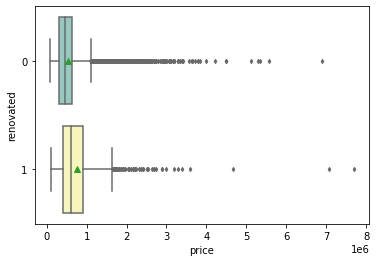

In [233]:
#boxplot for the transformed column renovates (0,1)
sns.boxplot(y = 'renovated', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True,
            fliersize = 3, palette="Set3")



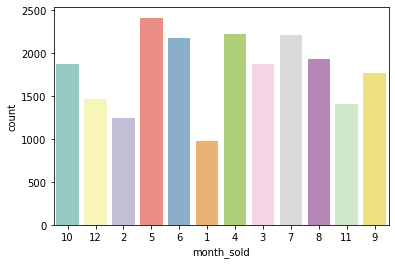

In [234]:
# let's check our month_sold and year_sold new column
sns.countplot(data['month_sold'], palette="Set3")
plt.show ()
#not really a big difference but may seems to be likable for buying/selling house

<AxesSubplot:xlabel='year_sold', ylabel='count'>

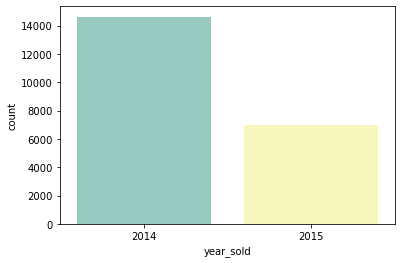

In [235]:
sns.countplot(data['year_sold'], palette="Set3")
# not really mind-blowing outcome! how many data i have in 2015 and 2014, check SQL

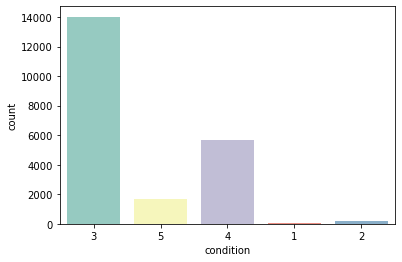

In [236]:
sns.countplot(data['condition'], palette="Set3")
plt.show ()

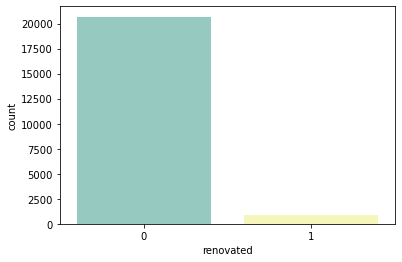

In [237]:
sns.countplot(data['renovated'], palette="Set3")
plt.show ()

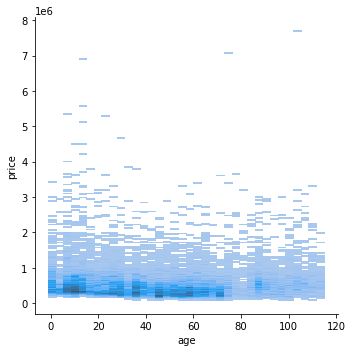

In [238]:
# how about the column age that we created
sns.displot(data=data, x="age", y="price")
#can't tell much sofar

In [239]:
# observation: 
#1. everything seems to be related to price:  grade, condition, waterfront, views, etc. 
#2. months and year are less relevant? May is the highest in relation to sales though
#3. I should most probably gauge the strength and direction of the relationship statistically!
#4. there are strong and positive relationship with the below variables. the strongst is bathrooms and grade!
# condition is least relevant.

In [240]:
# I know there must be an easier cleaner way to get the correlation coefficient
bed_rp = stats.spearmanr(data['bedrooms'], data['price'])
print (bed_rp)
bathrooms_rp = stats.spearmanr(data['bathrooms'], data['price'])
print (bathrooms_rp)
floors_rp = stats.spearmanr(data['floors'], data['price'])
print (floors_rp)
view_rp = stats.spearmanr(data['view'], data['price'])
print ( view_rp)
condition_rp = stats.spearmanr(data['condition'], data['price'])
print (condition_rp)
grade_rp = stats.spearmanr(data['grade'], data['price'])
print (grade_rp)
#waterfront_rp = stats.spearmanr(data['waterfront'], data['price'])
#print (waterfront_rp) 
#renovated_rp= stats.spearmanr(data['renovated'], data['price']) #coloumn i created, not very transparent
#print (renovated_rp)

SpearmanrResult(correlation=0.34417674142647964, pvalue=0.0)
SpearmanrResult(correlation=0.49729838992719705, pvalue=0.0)
SpearmanrResult(correlation=0.32248240702452324, pvalue=0.0)
SpearmanrResult(correlation=0.2939064867062198, pvalue=0.0)
SpearmanrResult(correlation=0.01799459221278457, pvalue=0.008180408794049663)
SpearmanrResult(correlation=0.2711243280709062, pvalue=0.0)


### Summary from visualization
* price goes up in relation to sqm_living, sqf_above, sqf_basement, no. of bathrooms and bedrooms, floors
* noticed relationship with price and grade and view, less with condition
* houses with waterfront are more likely to be higher
* houses with view 3 and 4 are more expensive than view 0,1 and 2
* renovated properties seem to have higher prices than non-renovated
* no significant relationship with sqft_lot, yr_built, long, lot 15, 
* number of bathrooms, bedrooms, sqft_living 15 have also significant relationship with sqm_living

leads to multiple regression analysis models
which features i am gonna decide upon? look at the correlation


# 4. Data preprocessing

In [241]:
# what have done so far?
#1. no missing data
#2.dealt with outliers, decided to keep them as they are legitmate
#3.feature engineering: transferred yr_renovated and yr_built, basement
#4. dropping columns
#Other insights from Sian: 
# binarise cat data into columns - using dummies or binarize tool
# bucket data into categories/binning- is it useful for the model? check tableau
# convert cat to num by encoding strings - OHE, label
# scale numeric features incl scaler, log
# normalize - optional!
#standardise - optional! (transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1)
# Custom transformations


In [242]:
#libraries needed
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [243]:
# let's drop not needed columns, mainly: 
del data['sqft_lot']
del data['sqft_lot15']
del data['yr_built']
del data['yr_renovated']
del data['sqft_basement']

In [244]:
data.shape

(21597, 19)

In [245]:
data.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,price,month_sold,year_sold,age,renovated,basement
0,3,1.00,1180,1.0,0,0,3,7,1180,98178,47.5112,-122.257,1340,221900,10,2014,59,0,0
1,3,2.25,2570,2.0,0,0,3,7,2170,98125,47.7210,-122.319,1690,538000,12,2014,63,1,400
2,2,1.00,770,1.0,0,0,3,6,770,98028,47.7379,-122.233,2720,180000,2,2015,82,0,0
3,4,3.00,1960,1.0,0,0,5,7,1050,98136,47.5208,-122.393,1360,604000,12,2014,49,0,910
4,3,2.00,1680,1.0,0,0,3,8,1680,98074,47.6168,-122.045,1800,510000,2,2015,28,0,0


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   floors         21597 non-null  float64
 4   waterfront     21597 non-null  object 
 5   view           21597 non-null  object 
 6   condition      21597 non-null  object 
 7   grade          21597 non-null  object 
 8   sqft_above     21597 non-null  int64  
 9   zipcode        21597 non-null  object 
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  price          21597 non-null  int64  
 14  month_sold     21597 non-null  object 
 15  year_sold      21597 non-null  object 
 16  age            21597 non-null  int64  
 17  renovated      21597 non-null  object 
 18  baseme

In [247]:
# let's create 2 dataframes to be more organised: numeric/continous and categrical/discrete
numeric_df= data.select_dtypes(include=np.number)

cat= ['object']
cat_df= data.select_dtypes(include=cat)

In [248]:
numeric_df.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,lat,long,sqft_living15,price,age
0,3,1.00,1180,1.0,1180,47.5112,-122.257,1340,221900,59
1,3,2.25,2570,2.0,2170,47.7210,-122.319,1690,538000,63
2,2,1.00,770,1.0,770,47.7379,-122.233,2720,180000,82
3,4,3.00,1960,1.0,1050,47.5208,-122.393,1360,604000,49
4,3,2.00,1680,1.0,1680,47.6168,-122.045,1800,510000,28


In [249]:
cat_df. head()

,waterfront,view,condition,grade,zipcode,month_sold,year_sold,renovated,basement
0,0,0,3,7,98178,10,2014,0,0
1,0,0,3,7,98125,12,2014,1,400
2,0,0,3,6,98028,2,2015,0,0
3,0,0,5,7,98136,12,2014,0,910
4,0,0,3,8,98074,2,2015,0,0


In [250]:
# what to do with our skewed data? normalization needed
numeric_df.skew() 
#we want that all the training and test variables to be scaled within a range of 0 to 1.therefore, normalization
#Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.

bedrooms         0.551442
bathrooms        0.519709
sqft_living      1.473215
floors           0.614497
sqft_above       1.447434
lat             -0.485522
long             0.884888
sqft_living15    1.106875
price            4.023365
age              0.468796
dtype: float64

In [251]:
numeric_df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
sqft_above         int64
lat              float64
long             float64
sqft_living15      int64
price              int64
age                int64
dtype: object

### Dealing with price on it is own as anyway it will be one variable in our y_test and train

In [252]:
# price is skewed to the left a lot, let's deal with it 
p= numeric_df['price']
p.skew()

4.023364652271239

In [253]:
# normalization
p_sqrt = np.sqrt(p)
p_sqrt.skew()

1.658363258393904

<AxesSubplot:>

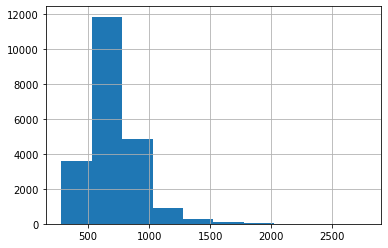

In [254]:
p_sqrt.hist()

In [255]:
# price is still skewed
p_log= np.log(p_sqrt)
p_log.skew()
#we can move now! do not forget P is our y!!!

0.4310041773299233

<AxesSubplot:>

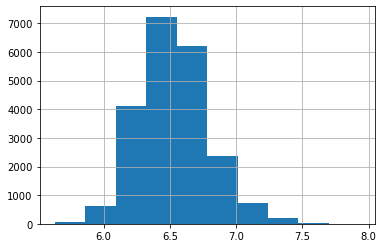

In [256]:
p_log.hist() #looks better

In [257]:
# let's normalize priceskew
p_n = StandardScaler()
p = np.array(p_log).reshape(-1,1)
p = p_n.fit_transform(p)
p

array([[-1.40203049],
       [ 0.27994485],
       [-1.79947215],
       ...,
       [-0.27301182],
       [-0.28296116],
       [-0.67730599]])

### transforming the rest numeric data for our x_train

In [258]:
#what to do with sqft_above, living, living 15?
# being specific with my features, wanted sqft_living, 15 and above

rest = numeric_df.drop(['price', 'sqft_living15', 'sqft_above', 'lat', 'long','age'],axis=1)

transformer = StandardScaler().fit(rest)
rest_standardized = transformer.transform(rest)
print(rest_standardized.shape)

(21597, 4)


In [259]:
rest

,bedrooms,bathrooms,sqft_living,floors
0,3,1.00,1180,1.0
1,3,2.25,2570,2.0
2,2,1.00,770,1.0
3,4,3.00,1960,1.0
4,3,2.00,1680,1.0
...,...,...,...,...
21592,3,2.50,1530,3.0
21593,4,2.50,2310,2.0
21594,2,0.75,1020,2.0
21595,3,2.50,1600,2.0


In [260]:
rest_standardized

array([[-0.41126094, -1.45107268, -0.98065209, -0.91555234],
       [-0.41126094,  0.17448579,  0.53336915,  0.93743087],
       [-1.51736336, -1.45107268, -1.4272339 , -0.91555234],
       ...,
       [-1.51736336, -1.77618438, -1.15492792,  0.93743087],
       [-0.41126094,  0.49959749, -0.52317805,  0.93743087],
       [-1.51736336, -1.77618438, -1.15492792,  0.93743087]])

### encoding categrical data

In [261]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   waterfront  21597 non-null  object
 1   view        21597 non-null  object
 2   condition   21597 non-null  object
 3   grade       21597 non-null  object
 4   zipcode     21597 non-null  object
 5   month_sold  21597 non-null  object
 6   year_sold   21597 non-null  object
 7   renovated   21597 non-null  object
 8   basement    21597 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [262]:
# for the first feautures test, i am not needing all the categricals 
feature1_df= cat_df.drop(['year_sold', 'month_sold', 'zipcode', 'renovated', 'basement', 'waterfront','view',
                     'condition'],axis=1)
feature1_df.head()

,grade
0,7
1,7
2,6
3,7
4,8


In [263]:
#Onehotencoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(feature1_df)
# encoder.categories_
grade_encoded = encoder.transform(feature1_df).toarray()
grade_encoded


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# 5. Model building

In [264]:
#import libraries related Scikit learn 
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.metrics import r2_score
from sklearn import neighbors  
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [265]:
# I will check quickly one linear regression model x=sqft_living, y=price.
# just to make it easy for my understanding- start simple

# # create training and testing sets: let's go with 80% 20%
# note I fitted and reshaped variables in the below code

train_data,test_data=train_test_split(data,train_size=0.8,random_state=3) #random_state to 
#get the same train and test subsets. 

lreg=linear_model.LinearRegression()

#reshaping and fitting train_data 

x_train=np.array(train_data['sqft_living']).reshape(-1,1) # done that after getting an error
y_train=np.array(train_data['price']).reshape(-1,1)
lreg.fit(x_train,y_train)

#reshaping and fitting test_data 
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=lreg.predict(x_test)

# the test_dataset predict the accuracy of the model

MSE=metrics.mean_squared_error(y_test,pred)

#RMSE = np.sqrt(MSE)
print('Sqaured mean error', round(np.sqrt(MSE),2))
#print("The root mean squared error: %6.2f" % (RMSE))
print('R squared training',round(lreg.score(x_train,y_train),3))
print('R sqaured testing',round(lreg.score(x_test,y_test),3) )
print('intercept',lreg.intercept_)
print('coefficient',lreg.coef_)

Sqaured mean error 271171.89
R squared training 0.499
R sqaured testing 0.467
intercept [-43739.61859471]
coefficient [[281.48917629]]


In [266]:
#Explanation Model 1 Linear regression:
#R-squared testing: 0.467. meaning less then half of the observed variables can be explained by 
#this model.
# Not gd results 

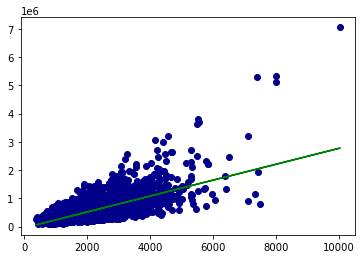

In [267]:
#let's plot it
plt.scatter(x_test, y_test, color= 'darkblue', label = 'data')
plt.plot(x_test, lreg.predict(x_test), color='green')


In [268]:
# the straight line can't capture all patterns.. underfitting 
# our model is over simplified, let's make it a biit complex so we overcome under-fitting!
#but be careful no over-fitting

### model multiple linear regression
#Train test split

In [269]:
# let's see our data 
#data.head()
#feature1_df.head()
#rest.head()
#numeric_df.head()

In [270]:
# let us split data into our x (features data) and y(p) price 
# model1: what features i am going for: ["bedrooms", "bathrooms","floors", "grade", "sqft_living"] based 
#on the correlation above 
# x,y

y= p # our normalized and transformed price
x= np.concatenate((rest_standardized, grade_encoded), axis=1)

#let split it into train and test set


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [271]:
x

array([[-0.41126094, -1.45107268, -0.98065209, ...,  1.        ,
         0.        ,  0.        ],
       [-0.41126094,  0.17448579,  0.53336915, ...,  1.        ,
         0.        ,  0.        ],
       [-1.51736336, -1.45107268, -1.4272339 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.51736336, -1.77618438, -1.15492792, ...,  1.        ,
         0.        ,  0.        ],
       [-0.41126094,  0.49959749, -0.52317805, ...,  0.        ,
         1.        ,  0.        ],
       [-1.51736336, -1.77618438, -1.15492792, ...,  1.        ,
         0.        ,  0.        ]])

## let's apply model 1
#with those features ["bedrooms", "bathrooms","floors", "grade", "sqft_living"] based 

In [272]:
reg = linear_model.LinearRegression()
model = reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
print (r2_score(y_test, predictions))
#print('Coefficients: \n', reg.coef_)


0.5537330537840095


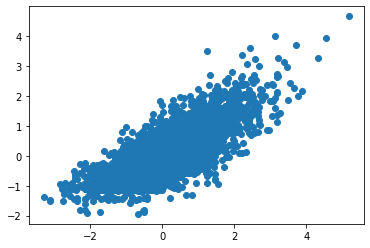

In [273]:
# how well our model did!
plt.scatter(y_test, predictions)
plt.show()

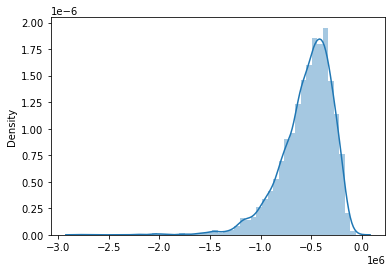

In [274]:
sns.distplot((y_test - pred), bins=50);

# Evaluation

In [275]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)


In [276]:
print_evaluate(y_test, reg.predict(X_test))

MAE: 0.5349021811359695
MSE: 0.4383877782591769
RMSE: 0.6621085849459867
R2 Square 0.5537330537840095


### Trying polynomial Regression

In [277]:
# can be applied if the data has a quadratic distribution.
#I know this can go in the direction of overfitting but I ran out of options considering the time limitaion.
# and i know it is no longer linesr regression!

#I kinda tell my model to stretch a bit 

y= p # our normalized and transformed price
x= np.concatenate((rest_standardized, grade_encoded), axis=1)

#converting the independent variables  with degree of polynomial 3

poly_reg = PolynomialFeatures(degree=2) # degree=1 is linear regression
x = poly_reg.fit_transform(x)
y= poly_reg.fit_transform (y)

#split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#applying model

reg = linear_model.LinearRegression()
model= reg.fit(X_train,y_train)

#predicting the value
predictions = reg.predict(X_test)


print (r2_score(y_test, predictions))

0.6497479879370383


In [278]:
print_evaluate(y_test, reg.predict(X_test))

MAE: 0.43501614417673923
MSE: 0.6573595252009784
RMSE: 0.810777111912379
R2 Square 0.6497479879370383


In [145]:
# I cheated I know but it did some trick here :)!!

## second try with different features
#### I did not remove outliers for 2 reasons: 1. they respond well to the increase of prices and 2. I don't want to miss exciting and charming datasets. 
#### my approach is to overfit my model and maybe if i got time, i can regularize it with more advanced model like Ridge Regression or Lasso 

In [279]:
# let's see our data 
#data.head()
cat_df.head()

#numeric_df.head()

,waterfront,view,condition,grade,zipcode,month_sold,year_sold,renovated,basement
0,0,0,3,7,98178,10,2014,0,0
1,0,0,3,7,98125,12,2014,1,400
2,0,0,3,6,98028,2,2015,0,0
3,0,0,5,7,98136,12,2014,0,910
4,0,0,3,8,98074,2,2015,0,0


#### my features will be [grade, sqft_living, waterfront, age, view, condition, bathrooms, renovated, month_sold,l at, long]
#### I included location as literature says it has an impact
#### my choice of features was based literally on what former researches say: 
* resources: 
#### https://www.researchgate.net/publication/342302491_Housing_Market_Prediction_Problem_using_Different_Machine_Learning_Algorithms_A_Case_Study
https://thesai.org/Downloads/Volume8No10/Paper_42-Modeling_House_Price_Prediction_using_Linear_Regression.pdf

In [280]:
# I am creating a new dataframe for the features I want
feature2num_df = numeric_df.drop(['floors', 'sqft_living15', 'sqft_above', 'price'],axis=1)
feature2num_df. head()

,bedrooms,bathrooms,sqft_living,lat,long,age
0,3,1.00,1180,47.5112,-122.257,59
1,3,2.25,2570,47.7210,-122.319,63
2,2,1.00,770,47.7379,-122.233,82
3,4,3.00,1960,47.5208,-122.393,49
4,3,2.00,1680,47.6168,-122.045,28


In [281]:
feature2cat_df= cat_df.drop(['year_sold', 'zipcode', 'basement'],axis=1)
feature2cat_df.head()

,waterfront,view,condition,grade,month_sold,renovated
0,0,0,3,7,10,0
1,0,0,3,7,12,1
2,0,0,3,6,2,0
3,0,0,5,7,12,0
4,0,0,3,8,2,0


In [282]:
# let's do some trnsformation 

# numeric transformation
transformer = StandardScaler().fit(feature2num_df)
num_standardized = transformer.transform(feature2num_df)
print(num_standardized.shape)

#categorial transformation

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(feature2cat_df)

encoder.categories
fea2encoded = encoder.transform(feature2cat_df).toarray()
fea2encoded


(21597, 6)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [283]:
#build model

#1. assign our y and x
y= p # our normalized and transformed price
x= np.concatenate((num_standardized, fea2encoded), axis=1)

#2. split test/train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#3. apply model
reg = linear_model.LinearRegression()
model = reg.fit(X_train,y_train)
predictions = reg.predict(X_test)
print (r2_score(y_test, predictions))
#print('Coefficients: \n', reg.coef_)

#4. evaluate

print_evaluate(y_test, reg.predict(X_test))


0.7578573076683657
MAE: 0.3759549752727122
MSE: 0.23786748674320035
RMSE: 0.487716604949227
R2 Square 0.7578573076683657


In [164]:
# this model sounds good but it is overfitting!! i will def. need to regulate this in a later stage 

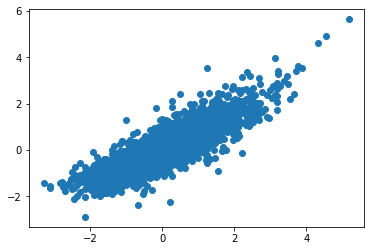

In [285]:
plt.scatter(y_test, predictions)
plt.show()

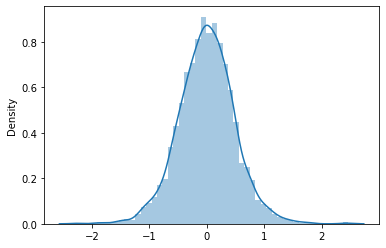

In [286]:
sns.distplot((y_test - predictions), bins=50);

In [458]:
data.to_csv('Mid_Term project.csv')

# wrap up, limitation and next steps 

* the price of houses relies on different and multiple factors (internally and externally): we approached this task by looking at the most correlated featues to the variable price. see above 
* please note that my first 2 trials were a huge failures, I did not include them in this notebook. 
* Due to time constraints, I could not test advanced model on my linear regression model. I wanted to try forest tree model and Lasso. 
* in genral it was a nice and long process for only 4 days!

* we came into a conclusion that there is no perfect fit: fitting a line into a dataset is not realistic, datasets are complex. Also exciting data happen not on the line :)

* we came into another conclusion that historical data is very important and the linear regression depends heavily on historical data. 

* the dataset was not fully in my opinion, literature has emphasized the importance of other features, mainly, neighborhood, access to hospitals and other facilities. 

* in order to improve the model we also need to link the price to other external elements (income, employment, gdp, interest rate)

* references: 

https://www.researchgate.net/publication/342302491_Housing_Market_Prediction_Problem_using_Different_Machine_Learning_Algorithms_A_Case_Study
https://thesai.org/Downloads/Volume8No10/Paper_42-Modeling_House_Price_Prediction_using_Linear_Regression.pdf
https://www.ijitee.org/wp-content/uploads/papers/v8i9/I7849078919.pdf
